In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8a3bec207f23c71082505738ef48f12dce9ba64ad318464731840003911f9e9b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


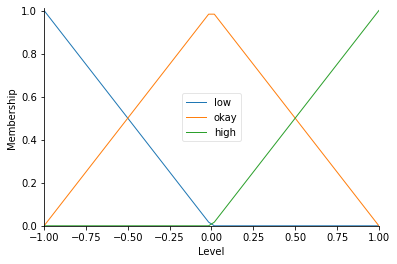

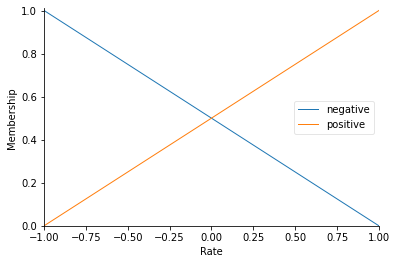

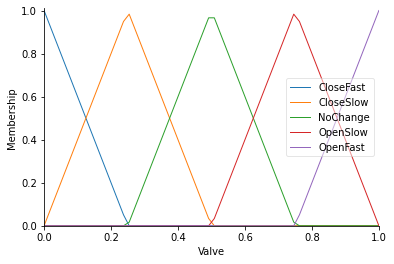

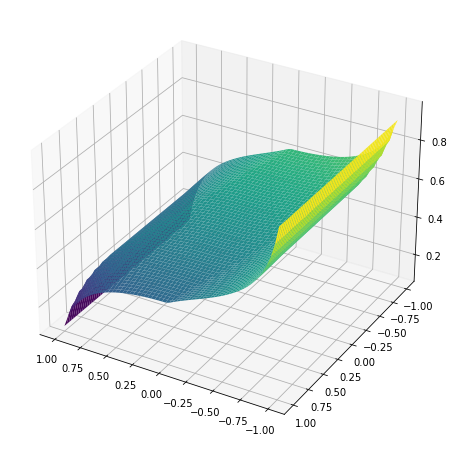

In [6]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_level = np.linspace(-1,1,60)
universe_rate = np.linspace(-1,1,60)
universe_valve = np.linspace(0,1,60)

level = ctrl.Antecedent(universe_level,'Level')
rate = ctrl.Antecedent(universe_rate,'Rate')
valve = ctrl.Consequent(universe_valve,'Valve')

name_level = ['low','okay','high']
name_rate = ['negative','positive']
name_valve = ['CloseFast','CloseSlow','NoChange','OpenSlow','OpenFast']
level.automf(names=name_level)
rate.automf(names=name_rate)
valve.automf(names=name_valve)

level.view()
rate.view()
valve.view()

rule1 = ctrl.Rule(antecedent=level['okay'],consequent=valve['NoChange'])
rule2 = ctrl.Rule(antecedent=level['low'],consequent=valve['OpenFast'])
rule3 = ctrl.Rule(antecedent=level['high'],consequent=valve['CloseFast'])
rule4 = ctrl.Rule(antecedent=(level['okay']&rate['positive']),consequent=valve['CloseSlow'])
rule5 = ctrl.Rule(antecedent=(level['okay']&rate['negative']),consequent=valve['OpenSlow'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=60*60+1)
upsampled = np.linspace(-1,1,60)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(60):
  for j in range(60):
    sim.input['Level'] = x[i,j]
    sim.input['Rate'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Valve']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,120)